# 

# Boston House Prices 
This notebook demonstrates how to use the Boston House Prices dataset to build a Regression predictive modeling machine learning problem from end-to-end in Python

| Column   | Description                                                                                   |
|----------|----------------------------------------------------------------------------------------------|
| CRIM     | Per capita crime rate by town                                                                |
| ZN       | Proportion of residential land zoned for lots over 25,000 sq.ft.                             |
| INDUS    | Proportion of non-retail business acres per town                                             |
| CHAS     | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)                        |
| NOX      | Nitric oxides concentration (parts per 10 million)                                           |
| RM       | Average number of rooms per dwelling                                                         |
| AGE      | Proportion of owner-occupied units built prior to 1940                                       |
| DIS      | Weighted distances to five Boston employment centers                                         |
| RAD      | Index of accessibility to radial highways                                                    |
| TAX      | Full-value property-tax rate per $10,000                                                     |
| PTRATIO  | Pupil-teacher ratio by town                                                                  |
| B        | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town                               |
| LSTAT    | % lower status of the population                                                             |
| MEDV     | Median value of owner-occupied homes in $1000s                                               |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib widget
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick
plt.style.use('./deeplearning.mplstyle')

In [2]:
# Loading dataset
df = pd.read_csv("housing.csv", header=None, delimiter=r'\s+')

# Adding column names
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = column_names

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


df[['RM']] returns a DataFrame (2D) instead of df['RM'] returns a Series (1D). Most scikit-learn functions expect the features (X) to be a 2D array (even if you have only one feature),so [['RM']] is the correct and recommended way for machine learning tasks.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select feature and target
# df[['RM']] returns a DataFrame (2D)
x = df[['RM']]
y = df['MEDV']

# Standardize features
x_scaler = StandardScaler()
x = pd.DataFrame(x_scaler.fit_transform(x), columns=['RM'])

# Standardize target
y_scaler = StandardScaler()
y = pd.Series(y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten(), name='MEDV')

# Split the data (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [4]:
X_train = np.array(x_train).ravel()
Y_train = np.array(y_train)

# m is the number of training examples
m = X_train.shape[0]
plt.close()

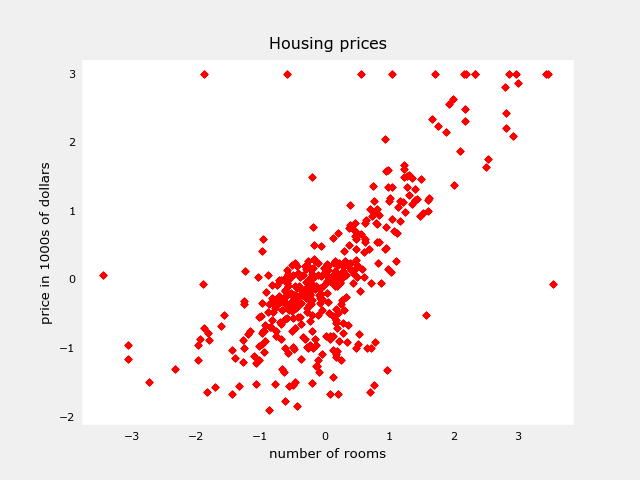

In [5]:
# plot the data points
plt.scatter(X_train, Y_train, marker='x', c='r', s=10)
# Set the title
plt.title("Housing prices")
plt.ylabel("price in 1000s of dollars")
plt.xlabel("number of rooms")
plt.show()

## Model function
the model function for linear regression (which is a function that maps from `x` to `y`) is represented as 
$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. 


In [6]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model 
    Args:
        x(ndarray (m,)): Data, m examples
        w,b (scalar)   : model parameters
    Returns
        y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb

Now let's call the `compute_model_output` function and plot the output..

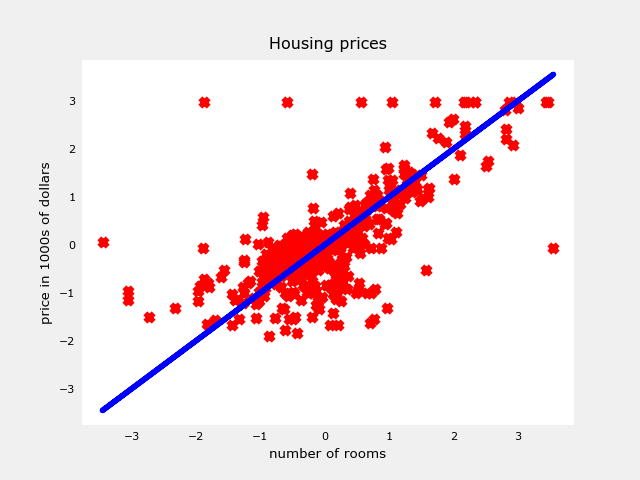

In [7]:
w=1
b=0
tmp_f_wb = compute_model_output(X_train, w, b,)
plt.plot(X_train, tmp_f_wb, c='b', label='our prediction')

# plot the data points
plt.scatter(X_train, Y_train, marker='x', c='r', label= 'Actual Values' )

# Set the title 
plt.title("Housing prices")
plt.ylabel("price in 1000s of dollars")
plt.xlabel("number of rooms")
plt.show()

interactive(children=(FloatSlider(value=0.0, description='w', max=4.0, min=-4.0), Output()), _dom_classes=('wi…

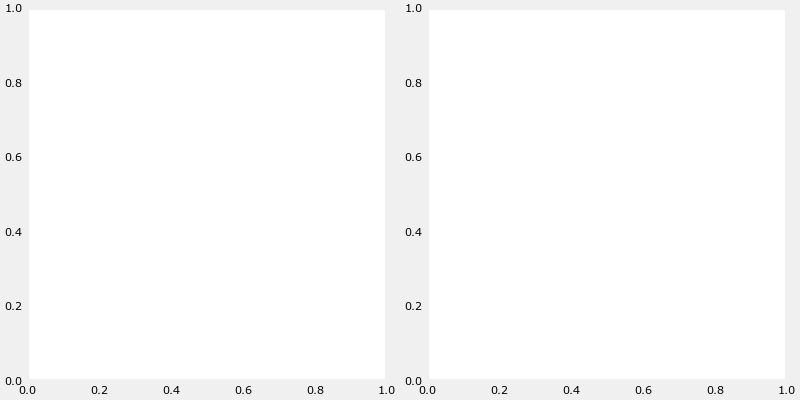

In [8]:
plt_intuition(X_train, Y_train)
plt.show()

In [9]:
plt.close()

In [10]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m=x.shape[0]
    sum_cost=0
    for i in range(m):
        cost= ((x[i]*w+b)-y[i])**2
        sum_cost = sum_cost+cost
    total_cost = sum_cost*(1/(m*2))
    return total_cost

In [11]:
compute_cost(X_train,Y_train,1,0)

np.float64(0.29641327362785147)

KeyError: 0

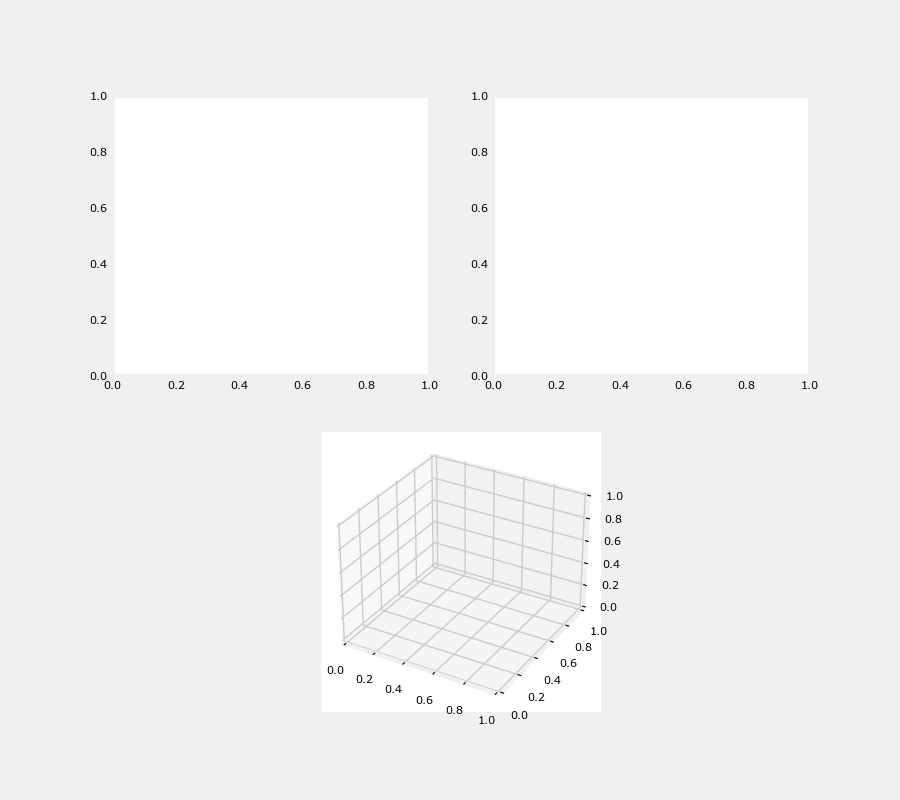

In [12]:

plt.close('all')
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)
